# КУРСОВИЙ ПРОЕКТ

## із дисципліни "Математичне моделювання"

## на тему "Моделювання замкненої екосистеми"

## студента групи КМ-82

## Буслаєва Валерія

### Теоретична частина

Для реалізації курсового проекту було обрано тему «Моделювання замкненої екосистеми».

Екосистема або екологічна система — це сукупність живих організмів (біоценоз), які пристосувалися до спільного проживання в певному середовищі існування (біотопі), утворюючи з ним єдине ціле. Одне з основних понять екології.

Приклад екосистеми — ставок з рослинами, рибами, безхребетними тваринами, мікроорганізмами, що живуть у ньому і становлять живий компонент системи, біоценоз. Для ставка як екосистеми характерні донні відкладення певного складу, певний хімічний склад (іонний склад, концентрація розчинених газів) і фізичні параметри (прозорість води, сезонний хід температури), а також певні показники біологічної продуктивності, трофічний статус і специфічні умови цієї водойми. Інший приклад екологічної системи - листяний ліс в середній смузі України з певним складом лісової підстилки, характерним для цього типу лісів ґрунтом і стійким рослинним угрупованням, і, як наслідок, зі строго визначеними показниками мікроклімату (температури, вологості, освітленості) і відповідним таким умовам середовища комплексом тваринних організмів. Важливим аспектом, що дозволяє визначати типи і межі екосистем, є трофічна структура угруповання і співвідношення виробників біомаси, її споживачів і організмів, які руйнують біомасу, а також показники продуктивності та обміну речовини і енергії.

Замкнена екосистема – така система, до якої зовні не потрапляє жодних ресурсів, тобто, для подальшого функціонування системи вона використовує лише ті ресурси, що має всередині себе (окрім, хіба що, сонячного світла, необхідного для життя рослин), а отже, звідси виникає декілька правил, за якими діє дана екосистема:

### Правила існування екосистеми

Наша майбутня замкнена екосистема буде функціонувати в першому наближенні за такими правилами:
- Повна маса системи, тобто сумарна маса усіх наявних в системі об’єктів, це стала величина;
- Система функціонує в обмеженому середовищі;
- Маса в системі розподіляється на два типи:
  - Жива маса, що наявна в рослинах та тваринах;
  -  Мертва маса, що складається з залишків організмів та посліду;
- Повна маса є цілим числом;
- Кожний елемент простору (клітинка поля) має деяку кількість мертвої маси на ній (далі будемо називати добривом), а також може мати на собі лише один організм;
- Організми можуть  споживати як добрива, так й інші організми;
- Організми можуть виконувати фіксоване число дій, і кожна дія зменшує масу організму на величину, пропорційну його масі. Потім зменшену масу скидають як добрива.

### Мождиві дії

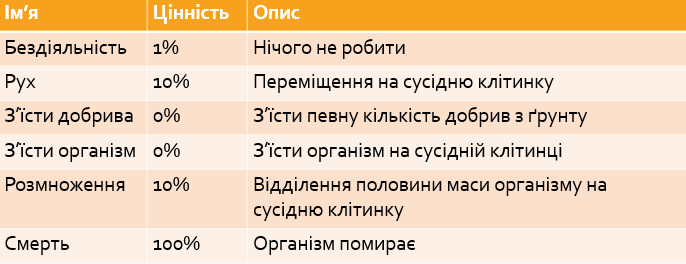

### Програмна реалізація

Імпортуємо потрібні бібліотеки:

In [1]:
import numpy as np
import os
import time
from termcolor import colored

Визначаємо константи розміру поля та максимальної маси організмів:

In [2]:
SIZE = 25

PLANT_MASS  = 1800
RABBIT_MASS = 5000

Тепер створюємо функції, що показують взаємодію організмів із навколишнім середовищем та з іншими організмами як всередині виду, так і з іншими представниками флори й фауни.

Функція переміщення:

In [3]:
def move(field_alive, field_dead, position, position_to_move, type_org):
	field_dead[position[0]][position[1]] += 0.1 * type_org
	field_alive[position[0]][position[1]][1] -= 0.1 * type_org
	field_alive[position_to_move[0]][position_to_move[1]] = field_alive[position[0]][position[1]]
	field_alive[position[0]][position[1]] = [None, 0]
	return field_alive, field_dead

Функція простою:

In [4]:
def stay(field_alive, field_dead, position):
	i, j = position[0], position[1]
	if field_alive[i][j][0] == 'P':
		field_alive[i][j][1] -= 0.01 * PLANT_MASS
		field_dead[i][j] += 0.01 * PLANT_MASS
	elif field_alive[i][j][0] == 'R':
		field_alive[i][j][1] -= 0.01 * RABBIT_MASS
		field_dead[i][j] += 0.01 * RABBIT_MASS
	elif field_alive[i][j][0] == 'F':
		field_alive[i][j][1] -= 0.01 * FOX_MASS
		field_dead[i][j] += 0.01 * FOX_MASS
	return field_alive, field_dead

Функція поїдання добрив з ґрунту рослинами:

In [5]:
def eat_dead(field_alive, field_dead, position, type_org):
	i, j = position[0], position[1]
	if type_org - field_alive[i][j][1] <= field_dead[i][j]:
		field_alive[i][j][1] = type_org
		field_dead[i][j] -= type_org - field_alive[i][j][1]
	else:
		field_alive[i][j][1] += field_dead[i][j]
		field_dead[i][j] -= field_dead[i][j]
	return field_alive, field_dead

Функція поїдання одного живого організму іншим:

In [6]:
def eat_alive(field_alive, position, position_to_eat, type_org):
	i, j = position[0], position[1]
	k, p = position_to_eat[0], position_to_eat[1]
	if type_org - field_alive[i][j][1] <= field_alive[k][p][1]:
		field_alive[i][j][1] = type_org
	else:
		field_alive[i][j][1] += field_alive[k][p][1]
	field_alive[k][p] = [None, 0]
	return field_alive

Функція смерті:

In [7]:
def die(field_alive, field_dead, position):
	i, j = position[0], position[1]
	field_dead[i][j] += field_alive[i][j][1]
	field_alive[i][j] = [None, 0]
	return field_alive, field_dead

Функція розмноження:

In [8]:
def copy(field_alive, field_dead, position, position_to_copy):
	i, j = position[0], position[1]
	field_dead[i][j] += 0.1 * field_alive[i][j][1]
	field_alive[i][j][1] = (field_alive[i][j][1] - 0.1 * field_alive[i][j][1])/2
	field_alive[position_to_copy[0]][position_to_copy[1]] = field_alive[i][j]
	return field_alive, field_dead

Функція, що перевіряє, чи бачить заєць рослину поблизу себе:

In [9]:
def rabbit_sees_plant(field_alive, position):
	plant_position = None
	position_to_move = None
	for i in range(position[0]-2, position[0]+3):
		for j in range(position[1]-2, position[1]+3):
			if i >= SIZE:
				ii = i - SIZE
			else:
				ii = i
			if j >= SIZE:
				jj = j - SIZE
			else:
				jj = j
			if field_alive[ii][jj][0] == 'P':
				plant_position = (ii,jj)
	if plant_position:
		for i in range(plant_position[0]-1, plant_position[0]+2):
			for j in range(plant_position[1]-1, plant_position[1]+2):
				if i >= SIZE:
					ii = i - SIZE
				else:
					ii = i
				if j >= SIZE:
					jj = j - SIZE
				else:
					jj = j
				if field_alive[ii][jj][0] == None:
					position_to_move = (ii,jj)
	return plant_position, position_to_move

Функція, що перевіряє, чи наявна рослина у безпосередній близькості до зайця (на сусідній клітниці):

In [10]:
def plant_near(field_alive, position):
	plant_position = None
	for i in range(position[0]-1, position[0]+2):
		for j in range(position[1]-1, position[1]+2):
			if i >= SIZE:
				ii = i - SIZE
			else:
				ii = i
			if j >= SIZE:
				jj = j - SIZE
			else:
				jj = j
			if field_alive[ii][jj][0] == 'P':
				plant_position = (ii,jj)
	return plant_position

Допоміжна функція, що перевіряє, чи наявна у безпосередній близькості до організму вільна клітинка для розмноження чи пересування:

In [11]:
def clear_position_near(field_alive, position):
	clear_position = None
	for i in range(position[0]-1, position[0]+2):
		for j in range(position[1]-1, position[1]+2):
			if i >= SIZE:
				ii = i - SIZE
			else:
				ii = i
			if j >= SIZE:
				jj = j - SIZE
			else:
				jj = j
			if field_alive[ii][jj][0] == None:
				clear_position = (ii,jj)
	return clear_position

Наостанок, створимо допоміжну функцію, що відображає увесь замкнений простір екосистеми:

In [12]:
def show_field(field):
	os.system('cls')
	for i in range(SIZE):
		creatures = ""
		for j in range(SIZE):
			if field[i][j][0] == None:
				creatures += "   "
			else:
				if field[i][j][0] == 'P':
					color = 'green'
				elif field[i][j][0] == 'R':
					color = 'red'
				creatures += " "
				creatures += colored(field[i][j][0], color)
				creatures += " "
		print(creatures)

Створимо поле для екосистеми:

In [13]:
field_alive = []
field_dead = []

for i in range(SIZE):
	field_alive.append([])
	field_dead.append([])
	for j in range(SIZE):
		field_alive[i].append([None, 0])
		field_dead[i].append(2000)

Тепер додамо на нього почтакові популяції рослин та зайців:

In [14]:
field_alive[6][5] = ["R", RABBIT_MASS]
field_alive[6][7] = ["R", RABBIT_MASS]
field_alive[7][16] = ["R", RABBIT_MASS]
field_alive[13][14] = ["R", RABBIT_MASS]
field_alive[16][6] = ["R", RABBIT_MASS]

field_alive[7][10] = ["P", PLANT_MASS]
field_alive[8][10] = ["P", PLANT_MASS]
field_alive[8][11] = ["P", PLANT_MASS]
field_alive[9][9] = ["P", PLANT_MASS]
field_alive[9][10] = ["P", PLANT_MASS]
field_alive[9][11] = ["P", PLANT_MASS]
field_alive[9][12] = ["P", PLANT_MASS]
field_alive[9][13] = ["P", PLANT_MASS]
field_alive[10][9] = ["P", PLANT_MASS]
field_alive[10][10] = ["P", PLANT_MASS]
field_alive[10][11] = ["P", PLANT_MASS]
field_alive[10][12] = ["P", PLANT_MASS]
field_alive[10][13] = ["P", PLANT_MASS]
field_alive[11][9] = ["P", PLANT_MASS]
field_alive[11][10] = ["P", PLANT_MASS]
field_alive[11][11] = ["P", PLANT_MASS]
field_alive[11][12] = ["P", PLANT_MASS]
field_alive[12][12] = ["P", PLANT_MASS]

Створюємо основний цикл існування нашої системи. Система буде функціонувати доти, доки в ній наявний хоча б один живий організм.

In [ ]:
num_of_orgs = 23
iteration = 0
while (num_of_orgs > 0):
	time.sleep(1)

	show_field(field_alive)
	num_of_orgs = 0
	iteration += 1
	print(f'\n\nIteration {iteration}')

	for i in range(SIZE):
		for j in range(SIZE):
			if field_alive[i][j][0] == "R":
				num_of_orgs += 1
				if field_alive[i][j][1] >= 0.6 * RABBIT_MASS and clear_position_near(field_alive, (i,j)):
					field_alive, field_dead = copy(field_alive, field_dead, (i,j), clear_position_near(field_alive, (i,j)))
				else:
					plant_position = plant_near(field_alive, (i,j))
					if plant_position:
						field_alive = eat_alive(field_alive, (i,j), plant_position, RABBIT_MASS)
					else:
						plant_position, position_to_move = rabbit_sees_plant(field_alive, (i,j))
						if position_to_move:
							field_alive, field_dead = move(field_alive, field_dead, (i,j), position_to_move, RABBIT_MASS)
						else:
							field_alive, field_dead = stay(field_alive, field_dead, (i,j))
				if field_alive[i][j][1] < 0.1 * RABBIT_MASS:
					field_alive, field_dead = die(field_alive, field_dead, (i,j))

	for i in range(SIZE):
		for j in range(SIZE):
			if field_alive[i][j][0] == "P":
				num_of_orgs += 1
				if field_alive[i][j][1] >= 0.6 * PLANT_MASS and clear_position_near(field_alive, (i,j)):
					field_alive, field_dead = copy(field_alive, field_dead, (i,j), clear_position_near(field_alive, (i,j)))
				else:
					field_alive, field_dead = eat_dead(field_alive, field_dead, (i,j), PLANT_MASS)
				if field_alive[i][j][1] < 0.1 * PLANT_MASS:
					field_alive, field_dead = die(field_alive, field_dead, (i,j))

Скріншоти існування екосистеми на різних ітераціях:

Екосистема на початковій стадії.

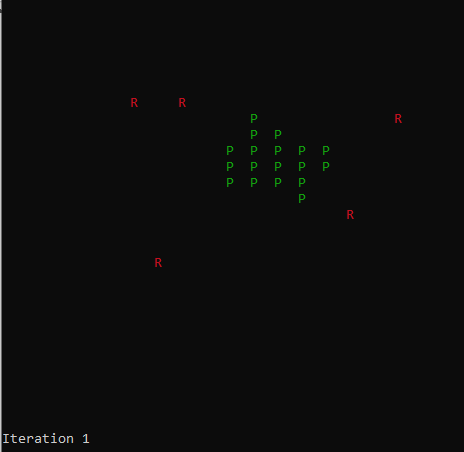

Популяція зайців стала надто великою для існування і скоро має зменшитися через брак їжі:

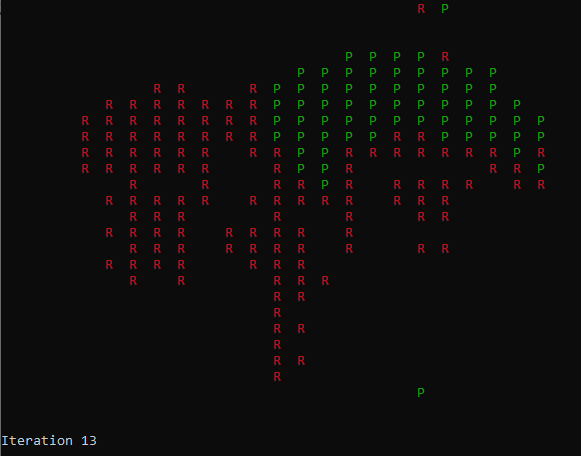

Система стабілізувала кількість зайців та рослин.

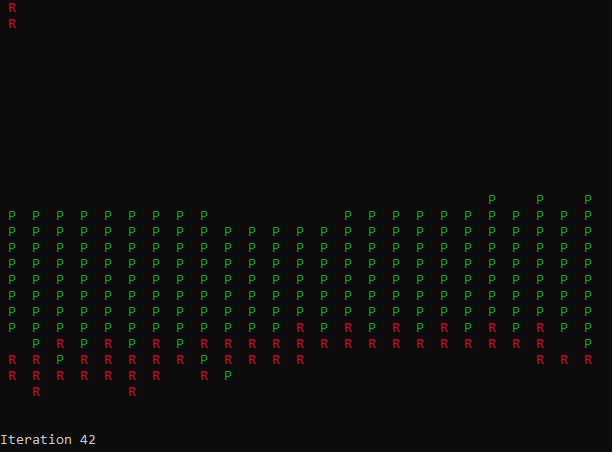

### ВИСНОВКИ

В ході розробки математичної моделі для даного проекту нами було розглянуто закони існування замкнутих екосистем, розроблено план дій для створення моделі власної екосистеми, та розроблено програмне забезпечення її реалізації.

В ході створення цієї системи було створено модель із двома видами організмів: рослинами, що поглинають добрива з ґрунту, та зайцями, що їдять рослини. В програмі реалізовано примітивний штучний інтелект у вигляді спуску по дереву рішень, які приймаються на основі пріоритетності дій обох типів організмів та умов навколишньої середи.

З огляду на все це можна стверджувати, що нами було досягнуто поставленої мети: розроблено та створено математичну та програмну модель функціонування замкненої екосистеми.